In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Using PJM Hourly Energy Consumption (AEP_hourly.csv as an example)
df = pd.read_csv("/content/drive/MyDrive/codes/series_data/AEP_hourly.csv")

In [3]:
# Step 2: Data Cleaning
# Convert 'Datetime' column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])
# Set Datetime as index
df.set_index('Datetime', inplace=True)
# Check for missing values
print("Missing values:\n", df.isnull().sum())
# Fill missing values with forward fill
df['AEP_MW'].fillna(method='ffill', inplace=True)


Missing values:
 AEP_MW    0
dtype: int64


/tmp/ipython-input-3-3859447628.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AEP_MW'].fillna(method='ffill', inplace=True)
/tmp/ipython-input-3-3859447628.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['AEP_MW'].fillna(method='ffill', inplace=True)


In [4]:
# Step 3: Exploratory Data Analysis
# Basic statistics
print("\nDataset Info:\n", df.info())
print("\nSummary Statistics:\n", df.describe())


# Extract year, month, day, and hour for analysis
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['Hour'] = df.index.hour

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121273 entries, 2004-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   AEP_MW  121273 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB

Dataset Info:
 None

Summary Statistics:
               AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000


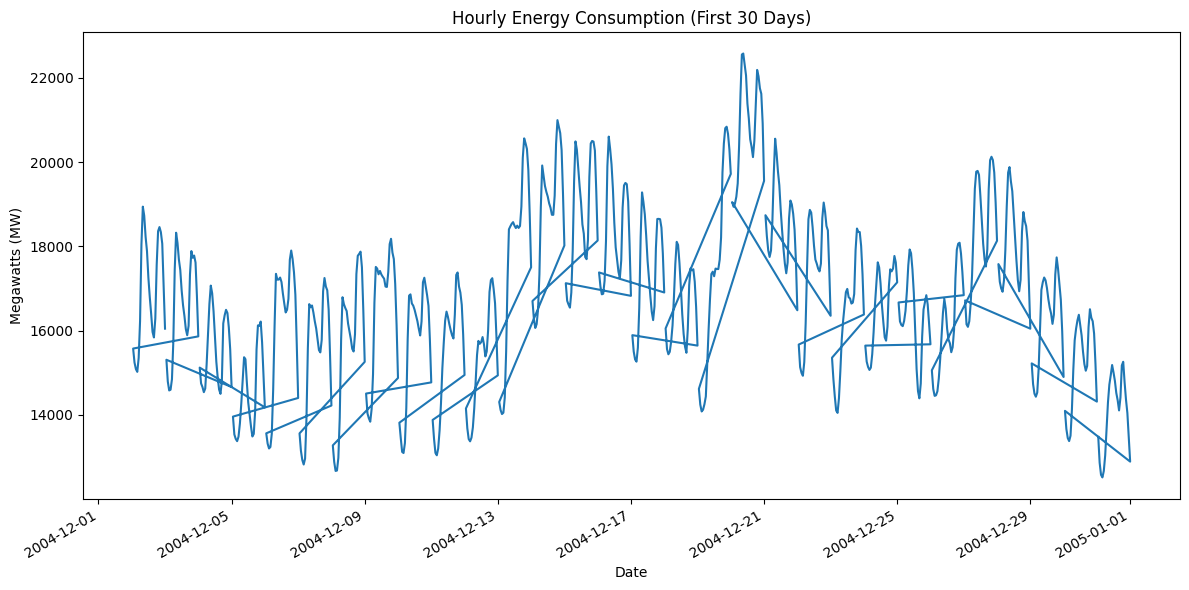

In [12]:
# Step 4: Visualizations
# Plot 1: Hourly energy consumption over a sample period (first 30 days)
plt.figure(figsize=(12, 6))
df['AEP_MW'][:720].plot(title='Hourly Energy Consumption (First 30 Days)', ylabel='Megawatts (MW)', xlabel='Date')
plt.tight_layout()
plt.savefig('hourly_energy_trend.png')
plt.show()

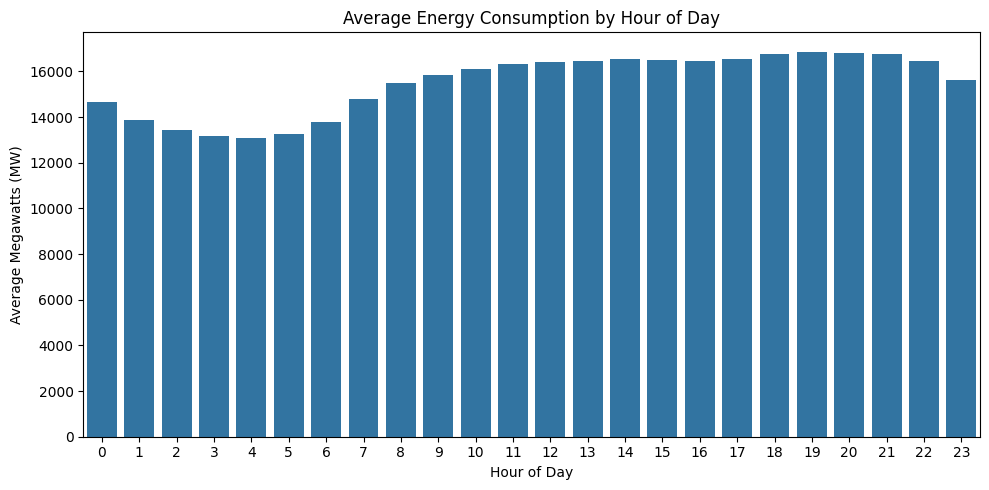

In [11]:
# Plot 2: Average energy consumption by hour of day
hourly_avg = df.groupby('Hour')['AEP_MW'].mean()
plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_avg.index, y=hourly_avg.values)
plt.title('Average Energy Consumption by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Megawatts (MW)')
plt.tight_layout()
plt.savefig('hourly_avg_energy.png')
plt.show()

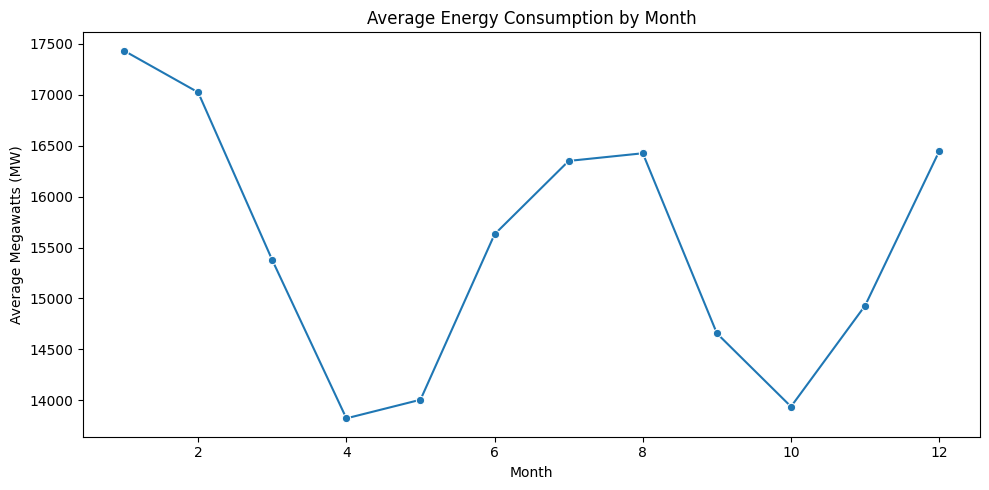

In [9]:
# Plot 3: Monthly average energy consumption
monthly_avg = df.groupby('Month')['AEP_MW'].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o')
plt.title('Average Energy Consumption by Month')
plt.xlabel('Month')
plt.ylabel('Average Megawatts (MW)')
plt.tight_layout()
plt.savefig('monthly_avg_energy.png')
plt.show()

<Figure size 1200x600 with 0 Axes>

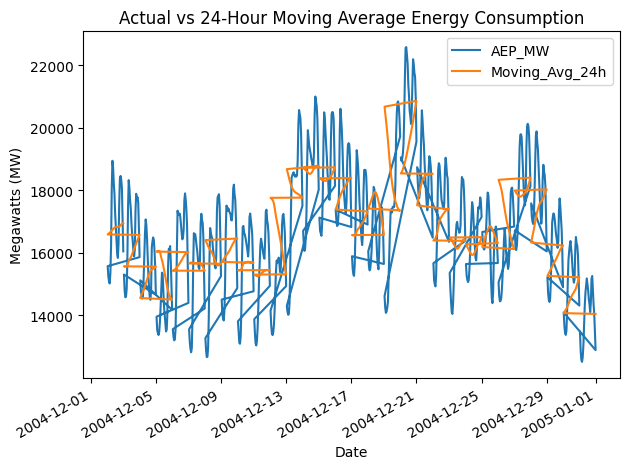


Analysis complete. Visualizations and summary saved.


In [10]:
# Step 5: Simple Time Series Forecasting (Moving Average)
# Calculate 24-hour moving average
df['Moving_Avg_24h'] = df['AEP_MW'].rolling(window=24).mean()

# Plot actual vs moving average for a sample period
plt.figure(figsize=(12, 6))
df[['AEP_MW', 'Moving_Avg_24h']][:720].plot(title='Actual vs 24-Hour Moving Average Energy Consumption', ylabel='Megawatts (MW)', xlabel='Date')
plt.tight_layout()
plt.savefig('moving_avg_forecast.png')
plt.show()

# Step 6: Save summary statistics to a file
df.describe().to_csv('energy_stats_summary.csv')
print("\nAnalysis complete. Visualizations and summary saved.")